# Necessary libraries

In [1]:
from ultralytics import YOLO
import cv2
import matplotlib.pyplot as plt
import pandas as pd
import os
from glob import glob

# Prepare dataset for YOLO

### download dataset and unzip

In [1]:
# download dataset
!wget https://huggingface.co/datasets/wider_face/resolve/main/data/WIDER_train.zip
!wget https://huggingface.co/datasets/wider_face/resolve/main/data/WIDER_val.zip
!wget https://huggingface.co/datasets/wider_face/resolve/main/data/WIDER_test.zip
# download labels
!wget http://shuoyang1213.me/WIDERFACE/support/bbx_annotation/wider_face_split.zip

--2023-05-21 09:13:50--  https://huggingface.co/datasets/wider_face/resolve/main/data/WIDER_train.zip
Resolving huggingface.co (huggingface.co)... 18.165.122.45, 18.165.122.68, 18.165.122.40, ...
Connecting to huggingface.co (huggingface.co)|18.165.122.45|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://cdn-lfs.huggingface.co/datasets/wider_face/e23b76129c825cafae8be944f65310b2e1ba1c76885afe732f179c41e5ed6d59?response-content-disposition=attachment%3B+filename*%3DUTF-8%27%27WIDER_train.zip%3B+filename%3D%22WIDER_train.zip%22%3B&response-content-type=application%2Fzip&Expires=1684901631&Policy=eyJTdGF0ZW1lbnQiOlt7IlJlc291cmNlIjoiaHR0cHM6Ly9jZG4tbGZzLmh1Z2dpbmdmYWNlLmNvL2RhdGFzZXRzL3dpZGVyX2ZhY2UvZTIzYjc2MTI5YzgyNWNhZmFlOGJlOTQ0ZjY1MzEwYjJlMWJhMWM3Njg4NWFmZTczMmYxNzljNDFlNWVkNmQ1OT9yZXNwb25zZS1jb250ZW50LWRpc3Bvc2l0aW9uPSomcmVzcG9uc2UtY29udGVudC10eXBlPSoiLCJDb25kaXRpb24iOnsiRGF0ZUxlc3NUaGFuIjp7IkFXUzpFcG9jaFRpbWUiOjE2ODQ5MDE2MzF9fX1dfQ__&Signature=pS1

In [ ]:
# unzip dataset
!unzip WIDER_train.zip
!unzip WIDER_val.zip
!unzip WIDER_test.zip
# unzip labels
!unzip wider_face_split.zip

## Merge images from different files

In [12]:
# for train images
files = [i for i in glob('WIDER_train/images/*')]

for i in files:
    cmd = f'cp {i}/* dataset/train/images'
    os.system(cmd)

In [13]:
# for validation images
files = [i for i in glob('WIDER_val/images/*')]

for i in files:
    cmd = f'cp {i}/* dataset/valid/images'
    os.system(cmd)

In [ ]:
# for test images
files = [i for i in glob('WIDER_test/images/*')]

for i in files:
    cmd = f'cp {i}/* dataset/test/images'
    os.system(cmd)

## Prepare labels from text files

In [ ]:
# unzip labels
!unzip labels.zip

### prepare train labels

In [125]:
with open('wider_face_split/wider_face_train_bbx_gt.txt') as f:
    a = f.read().split('\n')

In [127]:
data = 'dataset/train/images/'
for i in range(len(a)):
    if 'jpg' in a[i]:
        try:
            with open('dataset/train/labels/'+text_name, 'w') as f:
                f.write('\n'.join(bbox))
        except:
            pass
        img_name = data+a[i][a[i].find('/')+1:]
        text_name = a[i][a[i].find('/')+1:len(a[i])-4]+'.txt'
        img_shapes = cv2.imread(img_name).shape
        bbox = []
    elif not a[i].isdigit() and a[i] != '':
        sonlar = list(map(int, a[i].split()))
        sonlar[0] = (sonlar[0] + sonlar[2]//2) / img_shapes[1]
        sonlar[2] = sonlar[2] / img_shapes[1]
        sonlar[1] = (sonlar[1] + sonlar[3]//2) / img_shapes[0]
        sonlar[3] = sonlar[3] / img_shapes[0]
        sonlar = list(map(str, sonlar[:4]))
        bbox.append('0 '+' '.join(sonlar))
    if i == len(a)-1 and a[i] == '':
        with open('dataset/train/labels/'+text_name, 'w') as f:
            f.write('\n'.join(bbox))
        del text_name, img_shapes

### prepare validation labels

In [125]:
with open('wider_face_split/wider_face_val_bbx_gt.txt') as f:
    a = f.read().split('\n')

In [127]:
data = 'dataset/val/images/'
for i in range(len(a)):
    if 'jpg' in a[i]:
        try:
            with open('dataset/valid/labels/'+text_name, 'w') as f:
                f.write('\n'.join(bbox))
        except:
            pass
        img_name = data+a[i][a[i].find('/')+1:]
        text_name = a[i][a[i].find('/')+1:len(a[i])-4]+'.txt'
        img_shapes = cv2.imread(img_name).shape
        bbox = []
    elif not a[i].isdigit() and a[i] != '':
        sonlar = list(map(int, a[i].split()))
        sonlar[0] = (sonlar[0] + sonlar[2]//2) / img_shapes[1]
        sonlar[2] = sonlar[2] / img_shapes[1]
        sonlar[1] = (sonlar[1] + sonlar[3]//2) / img_shapes[0]
        sonlar[3] = sonlar[3] / img_shapes[0]
        sonlar = list(map(str, sonlar[:4]))
        bbox.append('0 '+' '.join(sonlar))
    if i == len(a)-1 and a[i] == '':
        with open('dataset/valid/labels/'+text_name, 'w') as f:
            f.write('\n'.join(bbox))
        del text_name, img_shapes

In [ ]:
# remove train images
!rm -rf WIDER_train
!rm -rf WIDER_train.zip
# remove test images
!rm -rf WIDER_test
!rm -rf WIDER_test.zip
# remove validation images
!rm -rf WIDER_val
!rm -rf WIDER_val.zip
# remove labels
!rm -rf wider_face_split

## Check the correctness of images and labels

In [30]:
# for train data
im = [i for i in glob('train_yolo/dataset/train/images/*')]
lab = [i for i in glob('train_yolo/dataset/train/labels/*')]

assert len(im) == len(lab), "the number of images is not equal to the number of labels"

im = set(map(lambda x: x[x.rfind('/')+1:len(x)-4], im))
lab = set(map(lambda x: x[x.rfind('/')+1:len(x)-4], lab))

assert len(im.difference(lab)) == 0, f"{len(im.difference(lab))} images names that difference from labels names"
assert len(lab.difference(im)) == 0, f"{len(lab.difference(im))} labels names that difference from images names"

In [31]:
# for validation data
im = [i for i in glob('train_yolo/dataset/valid/images/*')]
lab = [i for i in glob('train_yolo/dataset/valid/labels/*')]

assert len(im) == len(lab), "the number of images is not equal to the number of labels"

im = set(map(lambda x: x[x.rfind('/')+1:len(x)-4], im))
lab = set(map(lambda x: x[x.rfind('/')+1:len(x)-4], lab))

assert len(im.difference(lab)) == 0, f"{len(im.difference(lab))} images names that difference from labels names"
assert len(lab.difference(im)) == 0, f"{len(lab.difference(im))} labels names that difference from images names"

## Plot the labels

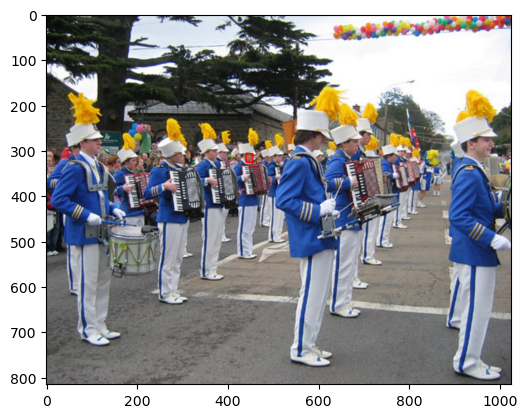

In [124]:
image = plt.imread('train_yolo/dataset/valid/images/0_Parade_marchingband_1_1045.jpg')

lists = [0.4365234375, 0.38773006134969323, 0.0146484375, 0.023312883435582823]

shapes = image.shape[:2]
lists[0] = int(lists[0]*shapes[1])
lists[1] = int(lists[1]*shapes[0])
lists[2] = int(lists[2]*shapes[1])
lists[3] = int(lists[3]*shapes[0])

lists[0] = lists[0]-lists[2]//2
lists[1] = lists[1]-lists[3]//2

start_point = (lists[0], lists[1])
end_point = (lists[0]+lists[2], lists[1]+lists[3])
color = (255, 0, 0)
thickness = 2
image = cv2.rectangle(image, start_point, end_point, color, thickness)
plt.imshow(image)